# A Standard Virus Load Function: Influenza data application

Here we consider a virus load function with three main phases given by

$$V(t)=v_1(t)v_2(t)v_3(t),$$

where $v _1$ describes the initial growth phase between $a _1$ and $a _2$ , $v _2$ the intermediate slow decay
phase between $a _2$ and $b _1$, and $v _3$ the final decay phase between $b _1$ and $b _2$. These functions are given as sigmoid and exponential functions, respectively

$$
\begin{aligned}
v_1(t) & = 1 + \frac{\max - 1}{2} \left[ \tanh \left( \frac{6}{a_2 - a_1} \left( t - \frac{a_1 + a_2}{2} \right) - \tanh  \left( -3\frac{a_2 + a_1}{a_2 - a_1} \right) \right) \right] \\
v_2(t) & = (1 - H(t - a_2)) + H(t - a_2)e^{-\alpha(t - a_2)} \\
v_3(t) & = 1 - \frac{1 - \min}{2} \left[ \tanh \left( \frac{6}{b_2 - b_1} \left( t - \frac{b_1 + b_2}{2} \right) - \tanh  \left( -3\frac{b_2 + b_1}{b_2 - b_1} \right) \right) \right],
\end{aligned}
$$

where $H(t)$ denotes the Heaviside function.




In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rcParams['figure.figsize'] = [8, 7]
mpl.rcParams['font.size'] = 18
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 8
def savefigs(filename):
    plt.gcf()
    imgdir = 'figures/'
    plt.savefig(imgdir + filename + '.pdf', bbox_inches='tight')
    plt.savefig(imgdir + filename + '.png', bbox_inches='tight')

In [4]:
from VirusLoadFunction import VirusLoadFunction

## Data
Using data from Smith et al. (2018), *Frontier in Microbiology*.

The dataset consists of a 13 observations of viral titers (in log10 scale) from the lung of 10 mice.

In [5]:
lines = open('../../data/Smith2018/Virus_Best10.txt').readlines()
data = []
for line in lines:
    data.append(np.array([float(p) for p in line.split(' ')]))
tdata = np.linspace(0., 12., len(data[0]))
print('Size of dataset: %d' % len(data))
print('Number of observations: %d' % len(data[0]))

Size of dataset: 10
Number of observations: 13


Showing data set

In [6]:
pd.DataFrame(data, columns=tdata, index=list(range(1,len(data)+1)))

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
1,0.0,4.18551,5.67816,6.00515,5.93640,5.97712,5.44716,5.19848,4.00515,0.0,0.0,0.0,0.0
2,0.0,3.99136,5.47712,5.84488,5.82436,5.81012,5.08740,4.49136,0.00000,0.0,0.0,0.0,0.0
3,0.0,3.49136,5.44716,5.81012,5.83815,5.78016,5.29540,5.01851,2.94716,0.0,0.0,0.0,0.0
4,0.0,3.29788,5.77233,6.24612,5.49136,5.96240,5.14412,5.51851,3.23882,0.0,0.0,0.0,0.0
5,0.0,4.75515,5.96240,6.44716,5.78016,5.83244,5.99136,4.96982,0.00000,0.0,0.0,0.0,0.0
6,0.0,4.30151,5.49136,6.86448,5.70812,5.80282,4.96240,4.47712,0.00000,0.0,0.0,0.0,0.0
7,0.0,3.49136,5.79540,5.74951,6.03148,5.82436,5.29540,5.17215,3.26036,0.0,0.0,0.0,0.0
8,0.0,4.00515,6.03148,5.83815,6.26036,6.12940,5.18551,4.83815,0.00000,0.0,0.0,0.0,0.0
9,0.0,3.49136,6.18551,5.78784,5.59921,5.97712,5.34488,5.47712,0.00000,0.0,0.0,0.0,0.0
10,0.0,4.50515,6.17215,6.03148,5.49136,5.34242,5.81012,5.01188,0.00000,0.0,0.0,0.0,0.0


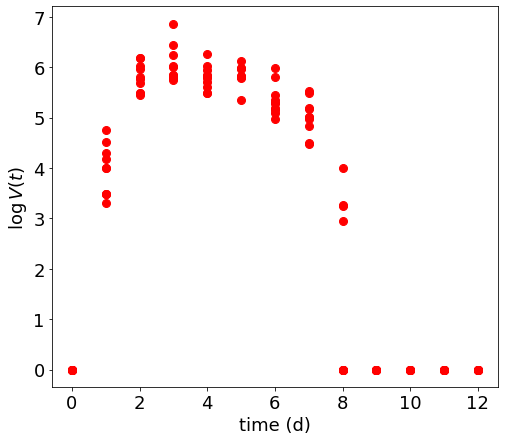

In [7]:
for vdata in data:
    plt.plot(tdata, vdata, 'ro')
plt.xlabel('time (d)')
plt.ylabel('$\log\, V(t)$')
savefigs('Smith2018Data')
plt.show()

## Fitting the model

We can fit the model to either the average for time point, or the whole data set combined (10 observation per time).

For the fitting we constrain the parameter values to be non-negative and less than the maximum time (for $a_1$, $a_2$, $b_1$, and $b_2$).

The fitting function (`least_square` via `curve_fit`) uses the Trust Region Reflective algorithm for constrained minimization built-in in the [`scipy.optimization` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). 

Using Thomas' best initial guess
$$
a_1=1.0,\quad a_2=2.2,\quad b_1=7.0,\quad b_2=9.5,\quad \alpha=0.5,\quad \min=10^{-6},\quad \max=10^{6}.
$$

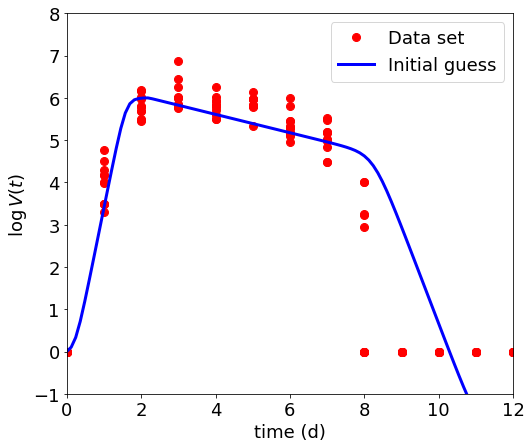

In [8]:
vl = VirusLoadFunction(tdata, vdata[0])
par0 = [1.0, 2.2, 7., 9.5, 0.5, 1e-6, 1e6]
vl.InitialGuess(*par0)

ttdata = np.linspace(np.min(tdata), np.max(tdata), num=100)
vvdata = vl.Eval(ttdata, par0)

for vdata in data:
    plt.plot(tdata, vdata, 'ro')
plt.plot(tdata, data[0], 'ro', label='Data set')
plt.plot(ttdata, vvdata, 'b-', label='Initial guess')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.ylim((-1., 8.))
plt.ylabel('$\log\, V(t)$')
plt.legend()
savefigs('Smith2018InitialGuess')
plt.show()

### a) Average

Using the average for each time point to fit the model.

In [9]:
tdata_avg = tdata
vdata_avg = np.average(data, axis=0)
vdata_std = np.std(data, axis=0)
vl_avg = VirusLoadFunction(tdata_avg, vdata_avg)

Using Thomas' best initial guess
$$
a_1=1.0,\quad a_2=2.2,\quad b_1=7.0,\quad b_2=9.5,\quad \alpha=0.5,\quad \min=10^{-6},\quad \max=10^{6}.
$$

In [10]:
vl_avg.InitialGuess(*par0)
vl_avg.Fit()

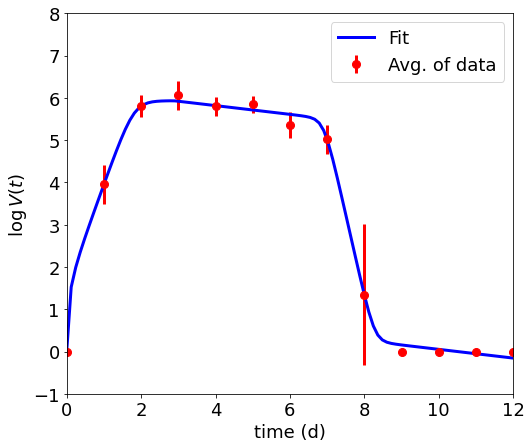

In [11]:
# discretation and evaluation
ttdata = np.linspace(np.min(tdata), np.max(tdata), num=100)
vvdata = vl_avg.Predict(ttdata)
# plotting
plt.errorbar(tdata_avg, vdata_avg, yerr=vdata_std, fmt='ro', color='red', label='Avg. of data')
plt.plot(ttdata, vvdata, 'b-', label='Fit')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.ylim((-1., 8.))
plt.ylabel('$\log\, V(t)$')
plt.legend()
savefigs('Smith2018FitAvgData')
plt.show()

The best fit is given by the estimated values (with standard error) and corresponding RSS.

In [12]:
print('\nEstimated parameter values:')
print('   \ta_1 \ta_2 \tb_1 \tb_2 \talpha \tmin \tmax')
print(' Est.\t%2.1f \t%2.1f \t%2.1f \t%2.1f \t%2.1f \t%1.0e \t%1.0e' % tuple(vl_avg.par))
print(' SE \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e' % tuple(vl_avg.par_se))
print('\nRSS: %4.2e' % vl_avg.RSS)


Estimated parameter values:
   	a_1 	a_2 	b_1 	b_2 	alpha 	min 	max
 Est.	0.7 	2.9 	6.2 	7.6 	0.2 	7e-06 	9e+05
 SE 	1e-01 	5e-01 	1e-01 	6e-02 	1e-01 	5e-06 	2e+05

RSS: 4.00e+00


In [13]:
print('RSS of initial guess: %4.2e' % sum(np.power(vl.Eval(tdata, par0) - vdata_avg, 2)))

RSS of initial guess: 2.72e+01


### b) Whole data set

Using the whole data set to fit the model.

In [14]:
tdata_all = np.reshape(np.repeat(tdata, len(data)), (1, -1), order='F')[0]
vdata_all = np.reshape(data, (1, -1), order='F')[0]
vl_all = VirusLoadFunction(tdata_all, vdata_all)

Using Thomas' best initial guess
$$
a_1=1.0,\quad a_2=2.2,\quad b_1=7.0,\quad b_2=9.5,\quad \alpha=0.5,\quad \min=10^{-6},\quad \max=10^{6}.
$$

In [15]:
vl_all.InitialGuess(*par0)
vl_all.Fit()

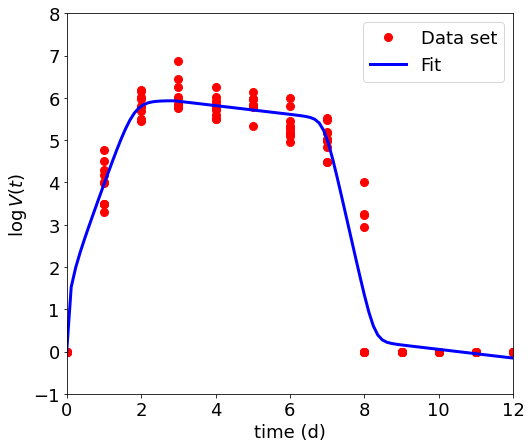

In [16]:
# discretation and evaluation
ttdata = np.linspace(np.min(tdata), np.max(tdata), num=100)
vvdata = vl_all.Predict(ttdata)
# plotting
plt.plot(tdata_all, vdata_all, 'ro', color='red', label='Data set')
plt.plot(ttdata, vvdata, 'b-', label='Fit')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.ylim((-1., 8.))
plt.ylabel('$\log\, V(t)$')
plt.legend()
savefigs('Smith2018FitAllData')
plt.show()

In [17]:
print('\nEstimated parameter values:')
print('   \ta_1 \ta_2 \tb_1 \tb_2 \talpha \tmin \tmax')
print(' Est.\t%2.1f \t%2.1f \t%2.1f \t%2.1f \t%2.1f \t%1.0e \t%1.0e' % tuple(vl_all.par))
print(' SE \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e' % tuple(vl_all.par_se))
print('\nRSS: %4.2e' % vl_all.RSS)


Estimated parameter values:
   	a_1 	a_2 	b_1 	b_2 	alpha 	min 	max
 Est.	0.7 	2.9 	6.2 	7.6 	0.2 	7e-06 	9e+05
 SE 	1e-01 	5e-01 	1e-01 	7e-02 	1e-01 	6e-06 	2e+05

RSS: 4.00e+00


## %95 percent confidence interval for $a_1$, $a_2$, $b_1$, and $a_2$

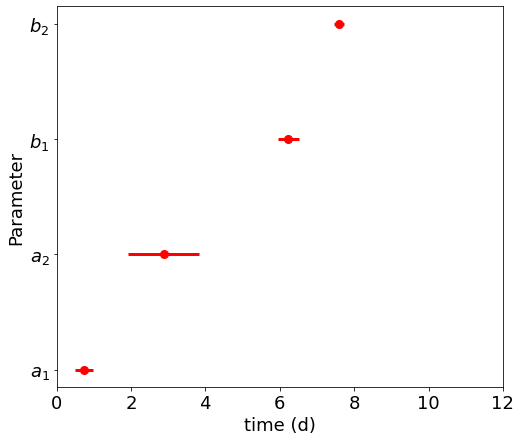

In [18]:
plt.errorbar(vl_all.par[:4], range(4), xerr=1.96*vl_all.par_se[:4], fmt='ro')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.yticks(range(4), ['$a_1$', '$a_2$', '$b_1$', '$b_2$'])
plt.ylabel('Parameter')
plt.show()